In [2]:
%reload_ext autoreload
%autoreload 2

from src.backtest import Backtest
from src.pattern import Pattern, Bollinger, High, GoldenCross, Trending, Disparity

# 기본설정

In [3]:
start = "2000-01-01"
end = "2025-12-31"
end_book = '2011-12-31'

bm = Pattern(name='모든주식')
bt = Backtest(start, end, benchmark=bm)

모든주식 | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

# 모든 주식

### 무차별 선택

In [3]:
stats = bt.analyze()
stats.to_frame()

count  arith_mean  geom_mean  rise_prob
pattern period scope                                                
모든주식    1W     overall  11490693.0    0.002614  -0.001247   0.462506
        2W     overall  11459341.0    0.005276  -0.002242   0.463692
        3W     overall  11432267.0    0.007980  -0.003186   0.463306
        1M     overall  11410343.0    0.010665  -0.004152   0.461397
        2M     overall  11332168.0    0.020445  -0.008009   0.459408
        3M     overall  11257941.0    0.029266  -0.011834   0.456440
        6M     overall  11042527.0    0.058772  -0.020638   0.451731

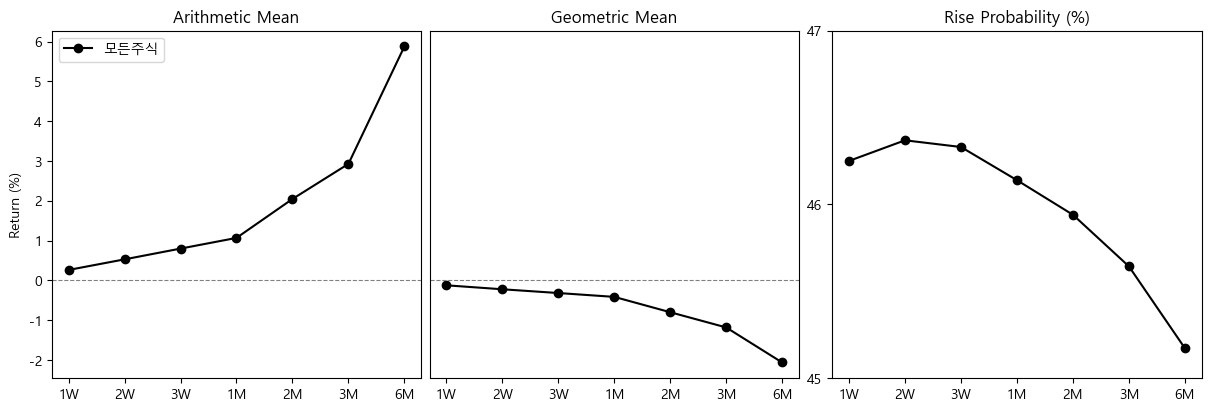

In [4]:
stats.plot(end=end);

### 상하위 제거 (remove)

상하위 1% 제외 | trim:   0%|          | 0/6409 [00:00<?, ?it/s]

상하위 5% 제외 | trim:   0%|          | 0/6409 [00:00<?, ?it/s]

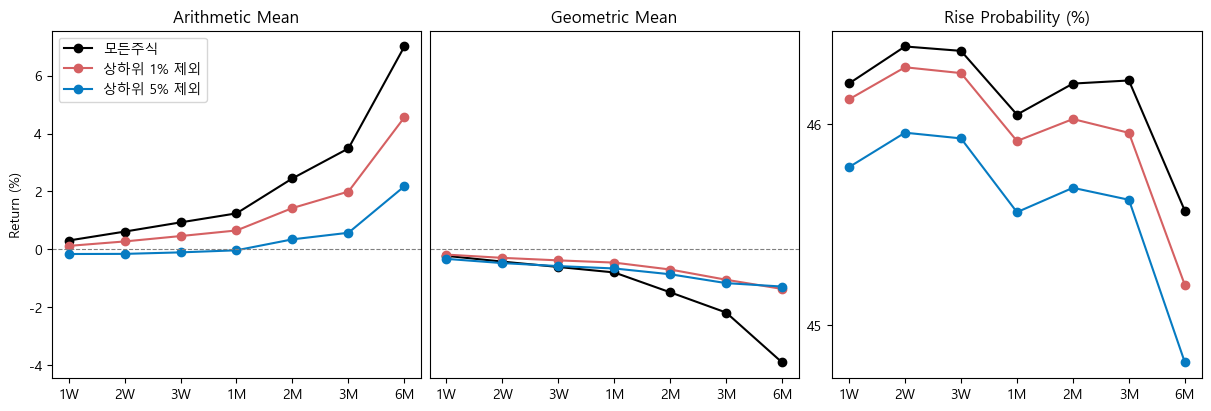

In [5]:
stats = bt.analyze(
    Pattern(name="상하위 1% 제외").trim(0.01),
    Pattern(name="상하위 5% 제외").trim(0.05),
)
stats.plot(end=end_book);

### 상하위 방향성은 인정 (winsorize)

상하위 1% 조정 | trim:   0%|          | 0/6409 [00:00<?, ?it/s]

상하위 5% 조정 | trim:   0%|          | 0/6409 [00:00<?, ?it/s]

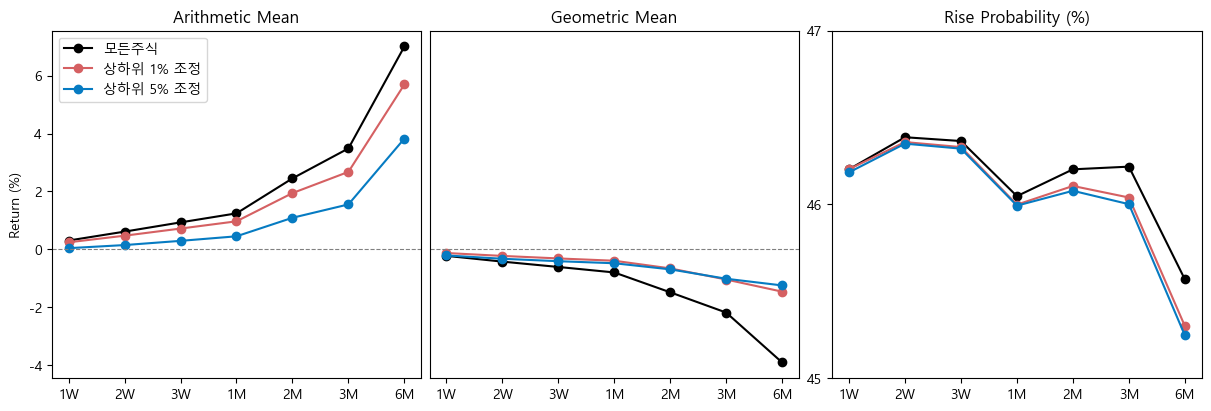

In [6]:
stats = bt.analyze(
    Pattern(name="상하위 1% 조정").trim(0.01, method='winsorize'),
    Pattern(name="상하위 5% 조정").trim(0.05, method='winsorize'),
)
stats.plot(end=end_book);

# 이평선

### 일반적인 이평선 상단돌파 자체가 크게 매력있다고 보기는 어렵다

이평선20d 돌파 | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

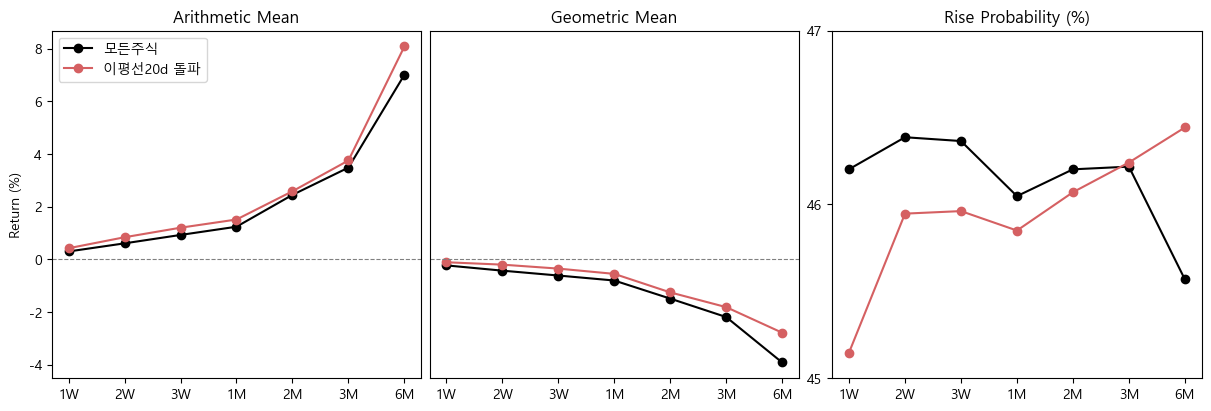

In [7]:
ma20 = Trending(name='이평선20d 돌파').on(trigger='breakout_up', window=20, cooldown_days=3)
stats = bt.analyze(ma20)
stats.plot(end=end_book);

### 이평선 산정기간이 길어질 수록 돌파의 의미가 커진다

이평선20d 돌파 | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

이평선60d 돌파 | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

이평선120d 돌파 | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

이평선252d 돌파 | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

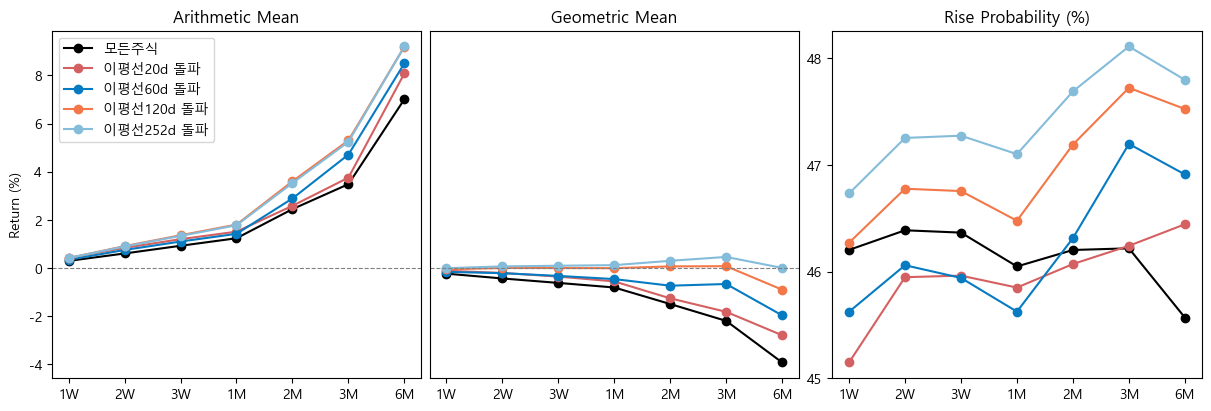

In [8]:
ma20 = Trending(name='이평선20d 돌파').on(trigger='breakout_up', window=20, cooldown_days=3)
ma60 = Trending(name='이평선60d 돌파').on(trigger='breakout_up', window=60, cooldown_days=3)
ma120 = Trending(name='이평선120d 돌파').on(trigger='breakout_up', window=120, cooldown_days=3)
ma252 = Trending(name='이평선252d 돌파').on(trigger='breakout_up', window=252, cooldown_days=3)
stats = bt.analyze(ma20, ma60, ma120, ma252)
stats.plot(end=end_book);

### 이평선 상향 기간이 길어지는 것도 도움이 된다

이평선20d 상향 | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

이평선60d 상향 | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

이평선120d 상향 | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

이평선252d 상향 | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

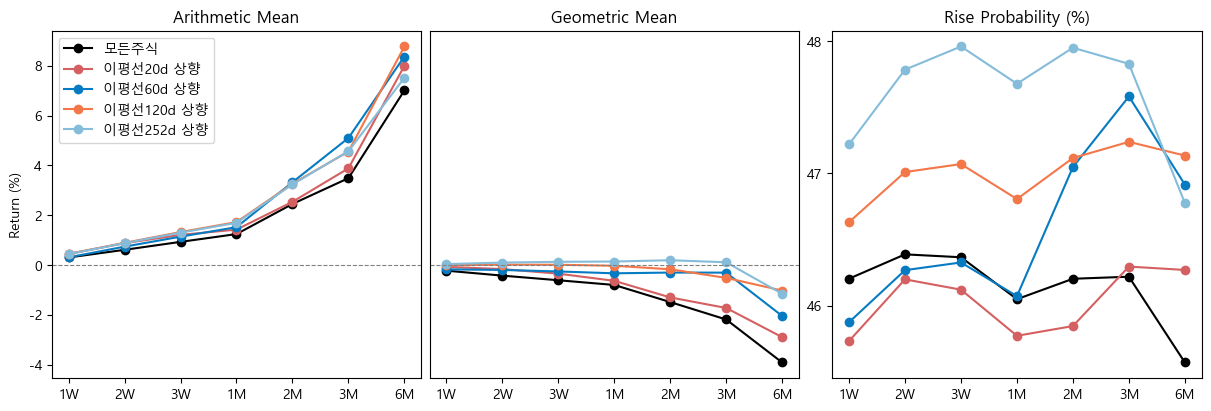

In [9]:
ma20_u = Trending(name='이평선20d 상향').on(trigger='ma_trend_up', window=20, cooldown_days=3)
ma60_u = Trending(name='이평선60d 상향').on(trigger='ma_trend_up', window=60, cooldown_days=3)
ma120_u = Trending(name='이평선120d 상향').on(trigger='ma_trend_up', window=120, cooldown_days=3)
ma252_u = Trending(name='이평선252d 상향').on(trigger='ma_trend_up', window=252, cooldown_days=3)
stats = bt.analyze(ma20_u, ma60_u, ma120_u, ma252_u)
stats.plot(end=end_book);

### 이평선 상향 상태에서 상향돌파는 상승신호

이평선20d 돌파 + 이평선20d 상향 | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

이평선60d 돌파 + 이평선60d 상향 | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

이평선120d 돌파 + 이평선120d 상향 | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

이평선252d 돌파 + 이평선252d 상향 | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

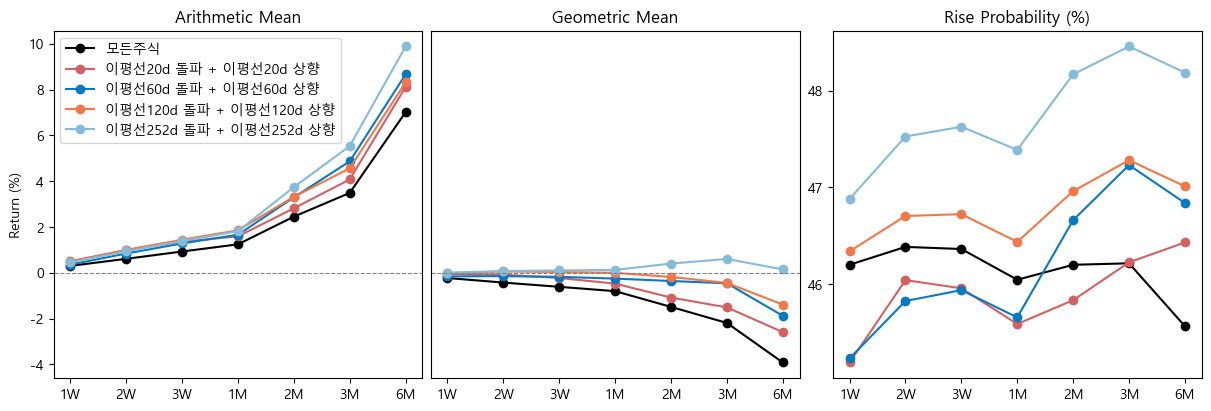

In [10]:
stats = bt.analyze(ma20+ma20_u, ma60+ma60_u, ma120+ma120_u, ma252+ma252_u)
stats.plot(end=end_book);

# 정배열

### 정배열은 시장 대비 제법 우위 있음

정배열 | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

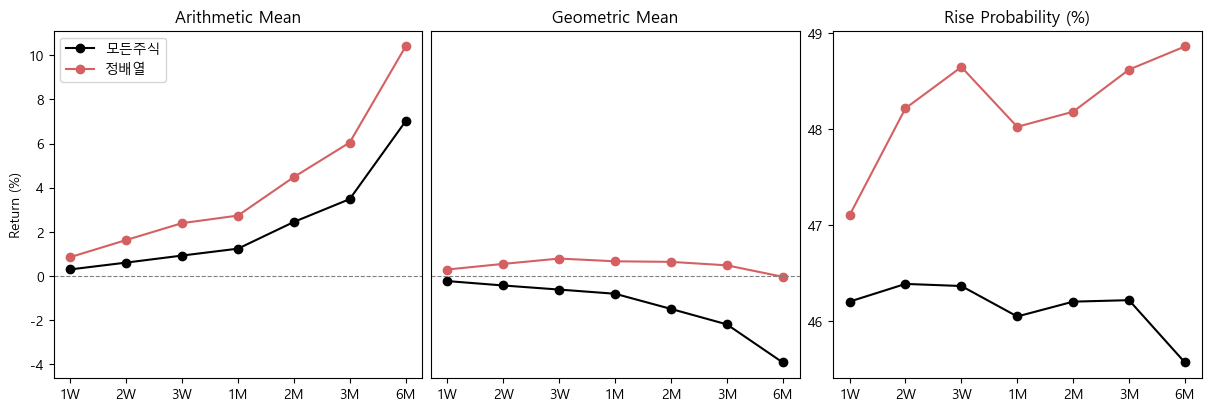

In [11]:
gc = GoldenCross(name='정배열').on(windows=[5,10,20,60,120], cooldown_days=10)
stats = bt.analyze(gc)
stats.plot(end=end_book);

### 코스피 정배열에서 발생한 종목 정배열은 금상첨화

정배열 | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

정배열 + 코스피정배열 | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

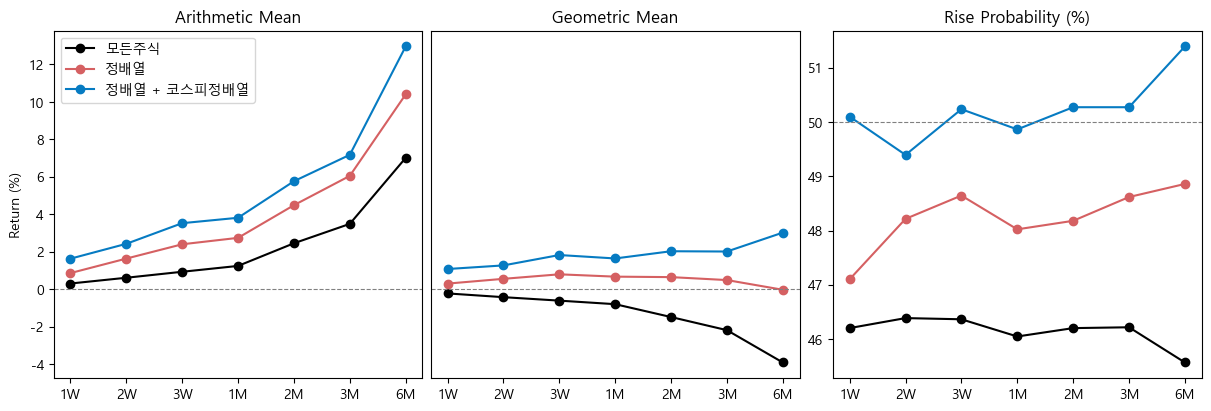

In [12]:
gc = GoldenCross(name='정배열').on(windows=[5,10,20,60,120], cooldown_days=10)
market_gc = GoldenCross(name='코스피정배열').market('kospi').on(windows=[5,10,20,60,120], cooldown_days=10)
stats = bt.analyze(gc, gc+market_gc)
stats.plot(end=end_book);

# 볼린저밴드

### 일반적인 상단돌파는 기대이하

볼린저돌파 | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

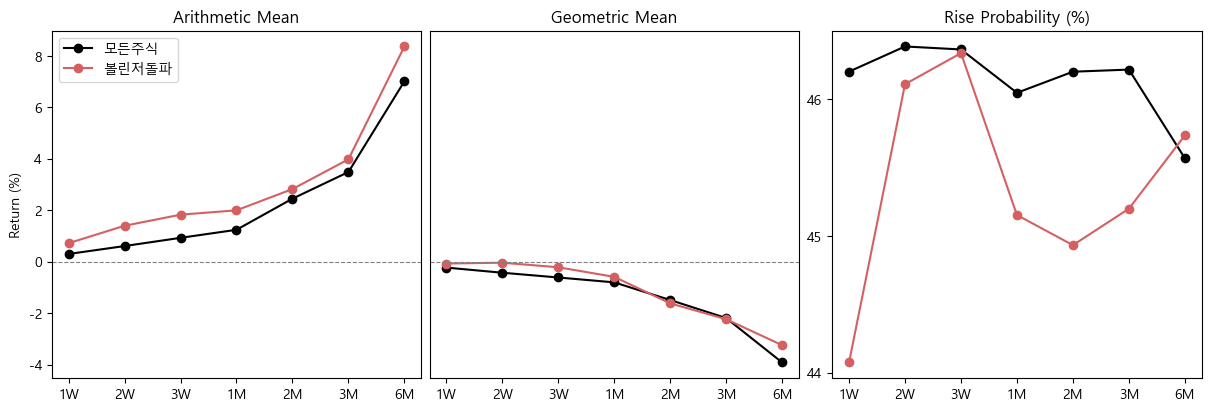

In [13]:
bb = Bollinger(name='볼린저돌파').on(trigger='breakout_up', breakout_cooldown_days=3)
stats = bt.analyze(bb)
stats.plot(end=end_book)

### 볼린저밴드 산정기간이 길어지면 돌파의 의미는 강해진다

돌파 20D | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

돌파 120D | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

돌파 350D | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

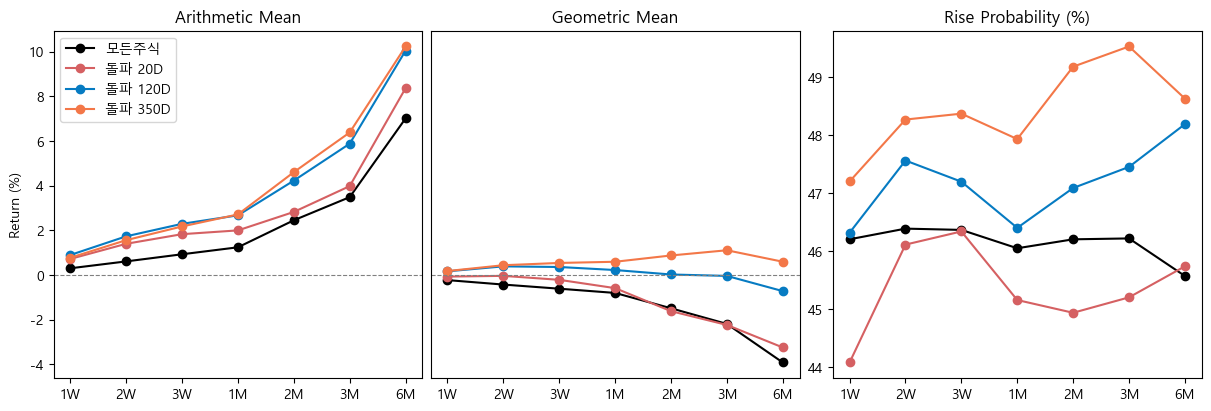

In [14]:
bb20 = Bollinger(name='돌파 20D', window=20).on(trigger='breakout_up', breakout_cooldown_days=3)
bb120 = Bollinger(name='돌파 120D', window=120).on(trigger='breakout_up', breakout_cooldown_days=3)
bb350 = Bollinger(name='돌파 350D', window=350).on(trigger='breakout_up', breakout_cooldown_days=3)
stats = bt.analyze(bb20, bb120, bb350)
stats.plot(end=end_book)

### 밴드 폭이 좁을수록 좋다

돌파 | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

돌파 폭16% | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

돌파 폭12% | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

돌파 폭8% | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

돌파 폭4% | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

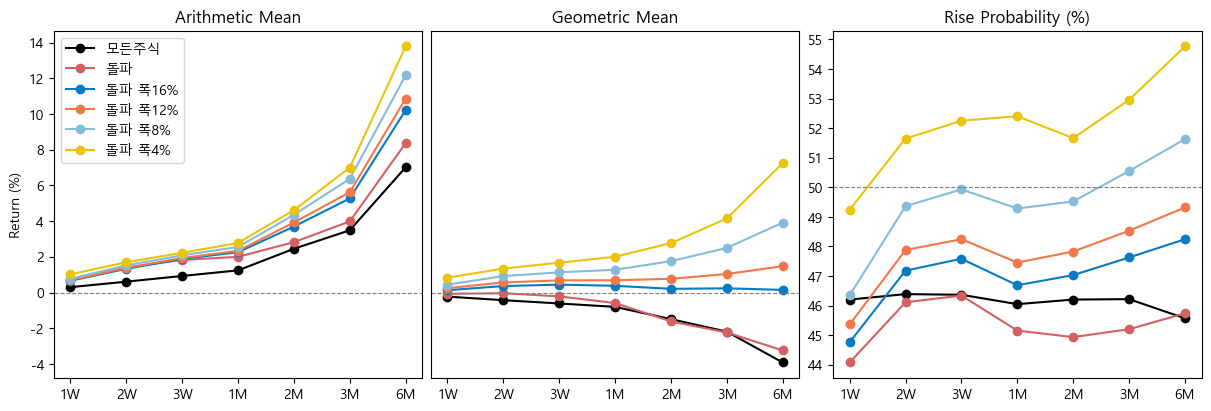

In [15]:
bb = Bollinger(name='돌파').on(trigger='breakout_up', breakout_cooldown_days=3)
bb16 = Bollinger(name='돌파 폭16%').on(trigger='breakout_up', breakout_cooldown_days=3, bandwidth_max=0.16)
bb12 = Bollinger(name='돌파 폭12%').on(trigger='breakout_up', breakout_cooldown_days=3, bandwidth_max=0.12)
bb8 = Bollinger(name='돌파 폭8%').on(trigger='breakout_up', breakout_cooldown_days=3, bandwidth_max=0.08)
bb4 = Bollinger(name='돌파 폭4%').on(trigger='breakout_up', breakout_cooldown_days=3, bandwidth_max=0.04)
stats = bt.analyze(bb, bb16, bb12, bb8, bb4)
stats.plot(end=end_book)

### 이평선(60d) 상향 조건을 추가하면 더 좋아진다

돌파 | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

돌파 폭16% + 이평상향 | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

돌파 폭12% + 이평상향 | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

돌파 폭8% + 이평상향 | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

돌파 폭4% + 이평상향 | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

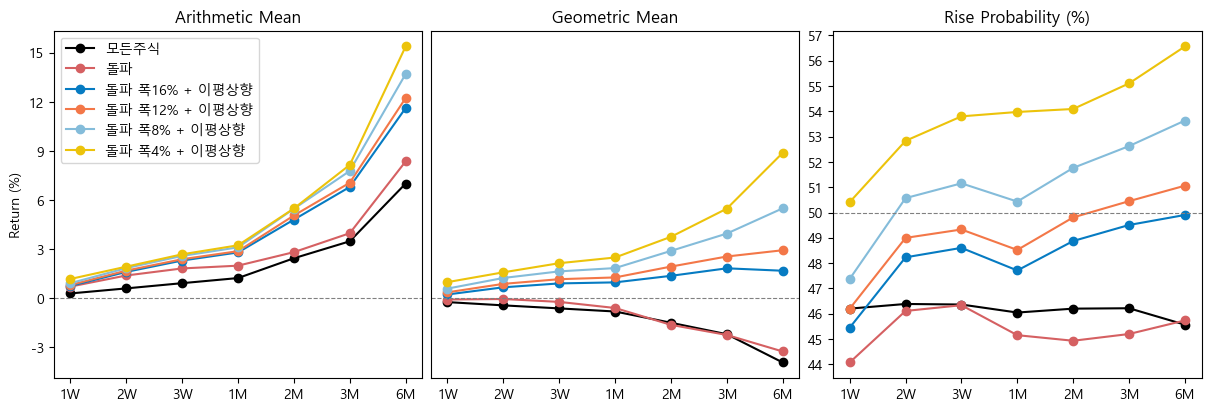

In [16]:
uptrend = Trending(name='이평상향').on(trigger='ma_trend_up', window=60)

bb = Bollinger(name='돌파').on(trigger='breakout_up', breakout_cooldown_days=3)
bb16 = Bollinger(name='돌파 폭16%').on(trigger='breakout_up', breakout_cooldown_days=3, bandwidth_max=0.16)
bb12 = Bollinger(name='돌파 폭12%').on(trigger='breakout_up', breakout_cooldown_days=3, bandwidth_max=0.12)
bb8 = Bollinger(name='돌파 폭8%').on(trigger='breakout_up', breakout_cooldown_days=3, bandwidth_max=0.08)
bb4 = Bollinger(name='돌파 폭4%').on(trigger='breakout_up', breakout_cooldown_days=3, bandwidth_max=0.04)
stats = bt.analyze(bb, bb16+uptrend, bb12+uptrend, bb8+uptrend, bb4+uptrend)
stats.plot(end=end_book)

### 밴드의 폭이 넓은 경우의 상단돌파는 형편없다

돌파 폭30% 이상 | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

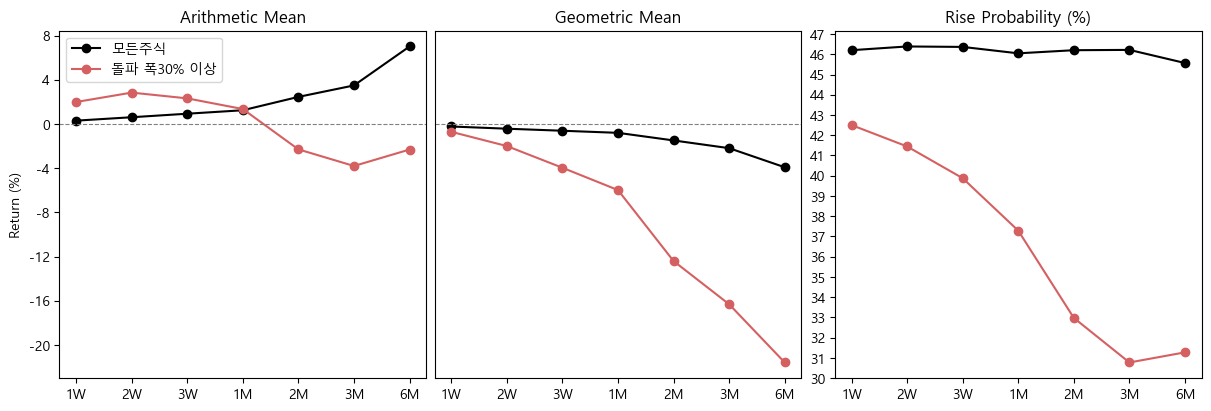

In [17]:
bb_wide = Bollinger(name='돌파 폭30% 이상').on(trigger='breakout_up', breakout_cooldown_days=3, bandwidth_min=0.3)
stats = bt.analyze(bb_wide)
stats.plot(end=end_book)

### 밴드의 폭이 좁다는 것 자체로도 매력이 있다

돌파 | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

폭 16% | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

폭 12% | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

폭 8% | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

폭 4% | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

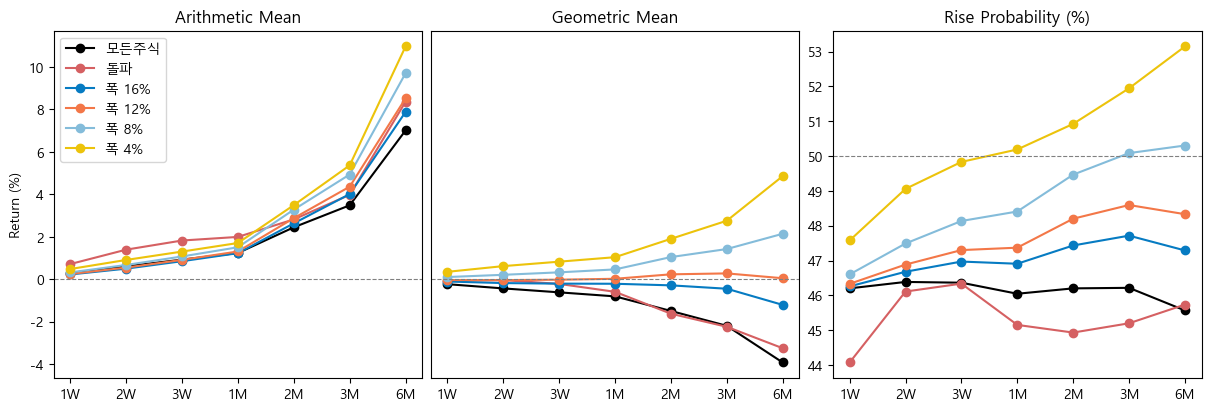

In [18]:
bb = Bollinger(name='돌파').on(trigger='breakout_up', breakout_cooldown_days=3)
bb16_n = Bollinger(name='폭 16%').on(bandwidth_max=0.16)
bb12_n = Bollinger(name='폭 12%').on(bandwidth_max=0.12)
bb8_n = Bollinger(name='폭 8%').on(bandwidth_max=0.08)
bb4_n = Bollinger(name='폭 4%').on(bandwidth_max=0.04)
stats = bt.analyze(bb, bb16_n, bb12_n, bb8_n, bb4_n)
stats.plot(end=end_book)

### 좁은 밴드에 오래 머물수록 돌파의 힘이 강해지는 경향이 있다

돌파 | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

돌파 폭4% | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

돌파 폭4% + 5일 유지 | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

돌파 폭4% + 10일 유지 | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

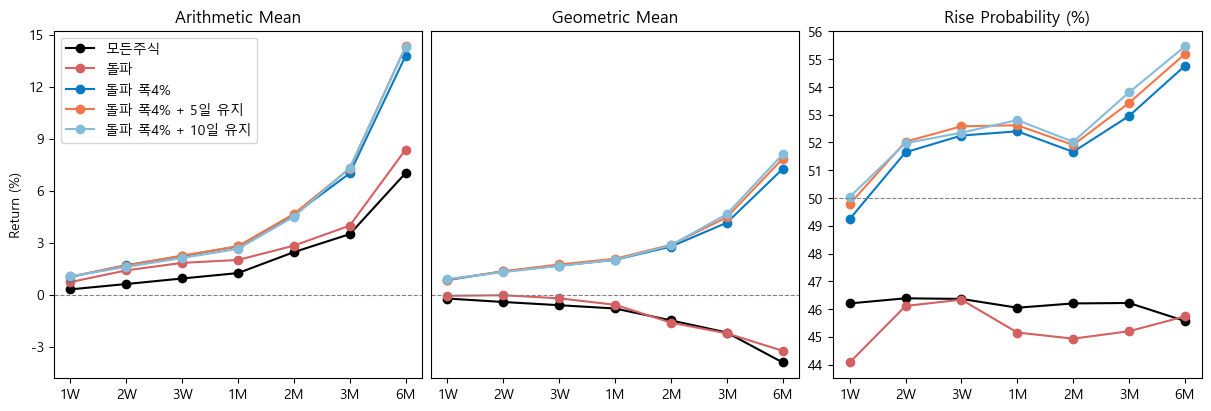

In [19]:
bb = Bollinger(name='돌파').on(trigger='breakout_up', breakout_cooldown_days=3)
bb4 = Bollinger(name='돌파 폭4%').on(trigger='breakout_up', breakout_cooldown_days=3, bandwidth_max=0.04)
bb4_stay5 = Bollinger(name='돌파 폭4% + 5일 유지').on(trigger='breakout_up', breakout_cooldown_days=3, bandwidth_max=0.04, bandwidth_stay_days=5)
bb4_stay10 = Bollinger(name='돌파 폭4% + 10일 유지').on(trigger='breakout_up', breakout_cooldown_days=3, bandwidth_max=0.04, bandwidth_stay_days=10)
stats = bt.analyze(bb, bb4, bb4_stay5, bb4_stay10)
stats.plot(end=end_book)

### 신고가 근처에서 발생한 상단돌파는 에너지가 더 강하다

돌파 폭8% | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

돌파 폭8% + 12주 고가 | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

돌파 폭8% + 52주 고가 | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

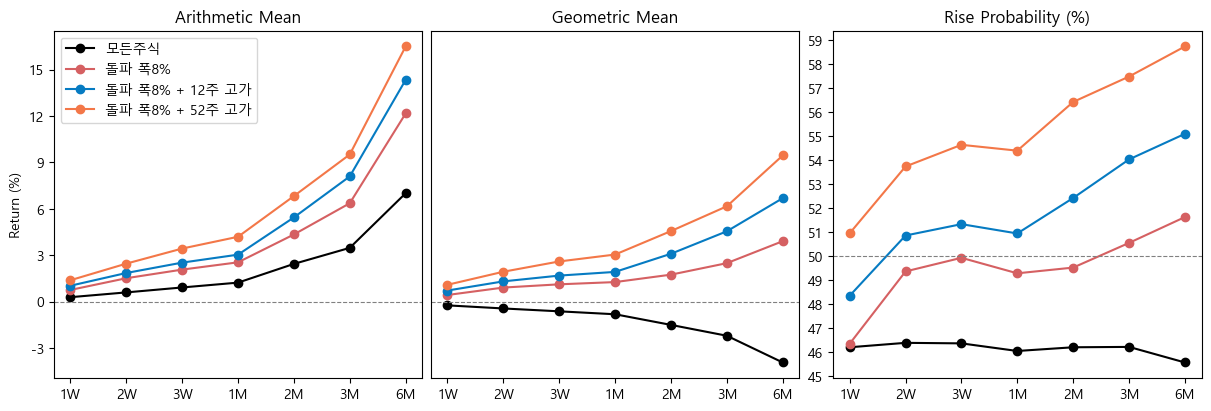

In [20]:
bb8 = Bollinger(name='돌파 폭8%').on(trigger='breakout_up', breakout_cooldown_days=3, bandwidth_max=0.08)
high12w = High(name='12주 고가').on(window=60, threshold=0.95, stay_days=1)
high52w = High(name='52주 고가').on(window=252, threshold=0.90, stay_days=1)

bb_high12w = bb8 + high12w
bb_high52w = bb8 + high52w

stats = bt.analyze(bb8, bb_high12w, bb_high52w)
stats.plot(end=end_book)

### 돌파보다 근접 (밴드폭을 고려하지 않았을 때)

돌파 | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

근접 3% | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

근접 3% + 3일 유지 | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

근접 3% + 5일 유지 | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

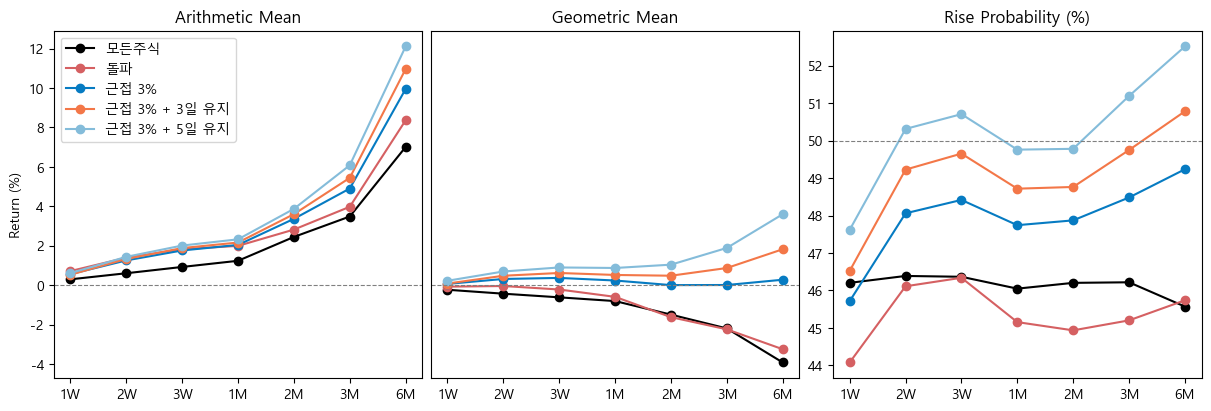

In [21]:
bb = Bollinger(name='돌파').on(trigger='breakout_up', breakout_cooldown_days=3)
bb_near = Bollinger(name='근접 3%').on(trigger='near_up', near_tolerance=0.03)
bb_near_stay3d = Bollinger(name='근접 3% + 3일 유지').on(trigger='near_up', near_tolerance=0.03, near_stay_days=3)
bb_near_stay5d = Bollinger(name='근접 3% + 5일 유지').on(trigger='near_up', near_tolerance=0.03, near_stay_days=5)
stats = bt.analyze(bb, bb_near, bb_near_stay3d, bb_near_stay5d)
stats.plot(end=end_book)

### 폭이 좁을 때는 상단근접이 도움이 되지 않는다

돌파 | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

돌파 폭4% | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

근접 3% + 5일 유지 | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

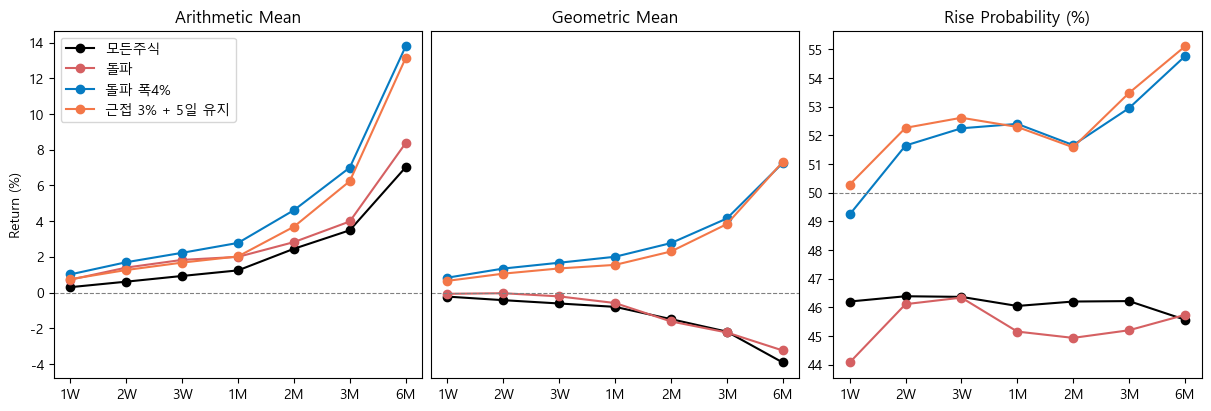

In [22]:
bb = Bollinger(name='돌파').on(trigger='breakout_up', breakout_cooldown_days=3)
bb4 = Bollinger(name='돌파 폭4%').on(trigger='breakout_up', bandwidth_max=0.04, breakout_cooldown_days=3)
bb_near = Bollinger(name='근접 3% + 5일 유지').on(trigger='near_up', near_tolerance=0.03, near_stay_days=5, bandwidth_max=0.04)
stats = bt.analyze(bb, bb4, bb_near)
stats.plot(end=end_book)

### 상단근접에 고점근접이 더해지면 금상첨화

돌파 | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

근접 3% + 5일 유지 | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

근접 3% + 5일 유지 + 52주 고가 | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

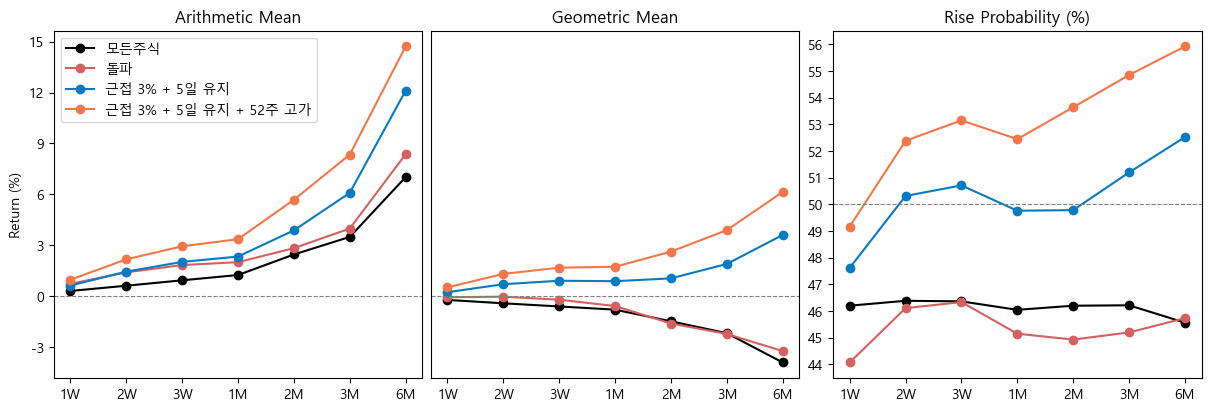

In [23]:
bb = Bollinger(name='돌파').on(trigger='breakout_up', breakout_cooldown_days=3)
high52w = High(name='52주 고가').on(window=252, threshold=0.90, stay_days=1)
bb_near = Bollinger(name='근접 3% + 5일 유지').on(trigger='near_up', near_tolerance=0.03, near_stay_days=5)
stats = bt.analyze(bb, bb_near, bb_near + high52w)
stats.plot(end=end_book)

# 이격도

### 단기적으로 유효하다

이격도 | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

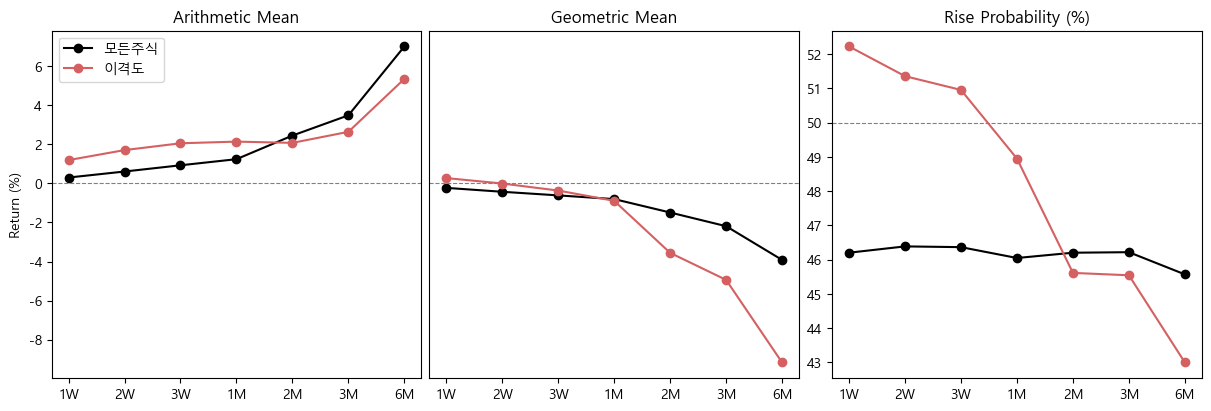

In [24]:
dp = Disparity(name="이격도", window=20).on(threshold=0.9)
stats = bt.analyze(dp)
stats.plot(end=end_book)

### 이격 유지기간이 길수록 단기구간에서 예후가 좋아지는 경향이 있다

이격도 1D | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

이격도 3D | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

이격도 5D | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

이격도 10D | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

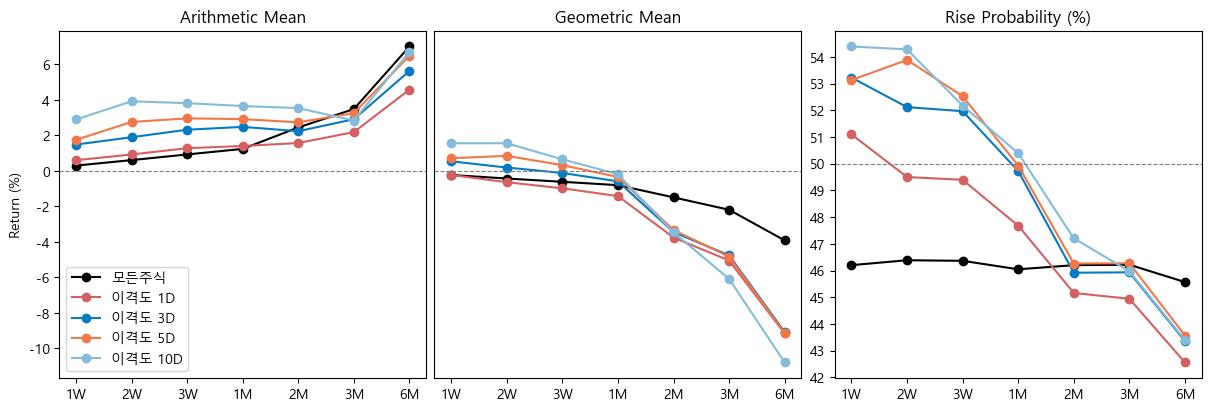

In [25]:
dp = Disparity(name="이격도 1D", window=20).on(threshold=0.9, cooldown_days=5)
dp_stay3 = Disparity(name="이격도 3D", window=20).on(threshold=0.9, stay_days=3, cooldown_days=5)
dp_stay5 = Disparity(name="이격도 5D", window=20).on(threshold=0.9, stay_days=5, cooldown_days=5)
dp_stay10 = Disparity(name="이격도 10D", window=20).on(threshold=0.9, stay_days=10, cooldown_days=5)
stats = bt.analyze(dp, dp_stay3, dp_stay5, dp_stay10)
stats.plot(end=end_book)

### 이격도는 추세전환의 의미가 있다
* 60일 이평선 상향상태에서 이격신호 발생 --> 하락방향으로의 추세전환
* 60일 이평선 하향상태에서 이격신호 발생 --> 상승방향으로의 추세전환

이격도 5D | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

이격도 5D + 이평선60D 상향 | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

이격도 5D + 이평선60D 하향 | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

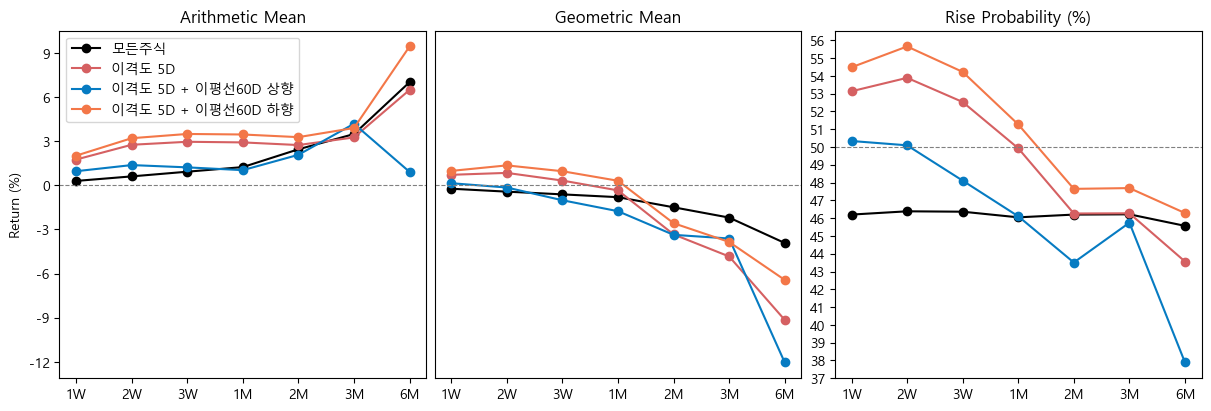

In [26]:
uptrend = Trending(name='이평선60D 상향').on(trigger='ma_trend_up', window=60)
downtrend = Trending(name='이평선60D 하향').on(trigger='ma_trend_down', window=60)
dp = Disparity(name="이격도 5D", window=20).on(threshold=0.9, stay_days=5, cooldown_days=5)
stats = bt.analyze(dp, dp+uptrend, dp+downtrend)
stats.plot(end=end_book)

### 이격의 정도가 일정수준까지 깊어지면 매력도가 커진다

이격도 90% | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

이격도 80% | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

이격도 70% | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

이격도 60% | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

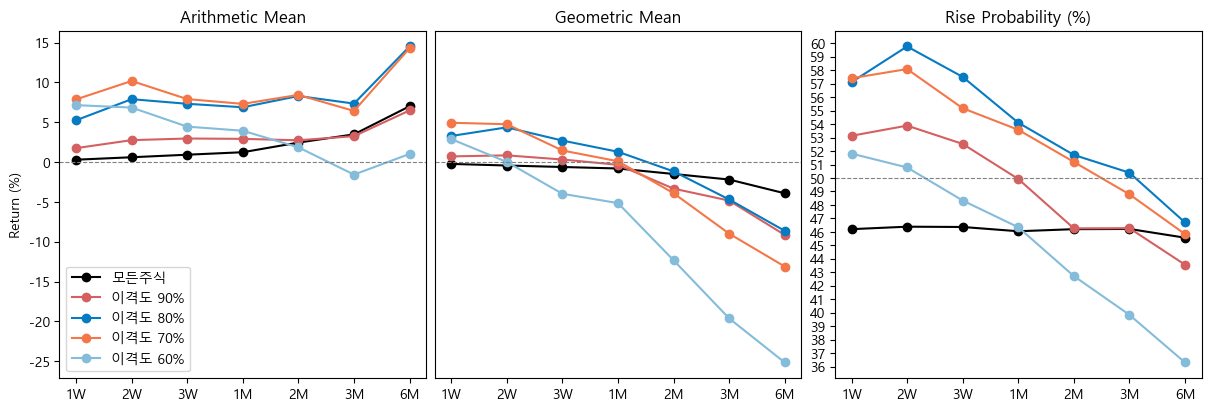

In [27]:
dp90 = Disparity(name="이격도 90%", window=20).on(threshold=0.9, stay_days=5, cooldown_days=5)
dp80 = Disparity(name="이격도 80%", window=20).on(threshold=0.8, stay_days=5, cooldown_days=5)
dp70 = Disparity(name="이격도 70%", window=20).on(threshold=0.7, stay_days=5, cooldown_days=5)
dp60 = Disparity(name="이격도 60%", window=20).on(threshold=0.6, stay_days=5, cooldown_days=5)
stats = bt.analyze(dp90, dp80, dp70, dp60)
stats.plot(end=end_book)

# 리밸런싱 실험

### 리밸런싱 규칙
* 전체구간 (2000-2025)
* 매일 리밸런싱 (매매비용: 매수 3bp, 매도 20bp)
* 코스피 전 종목에 대하여, 패턴 출현한 다음날 종가에 동일가중 포트폴리오로 매수
* 포트폴리오는 코호트 방식으로 관리: 전체 자금을 n 등분(target horizon) 으로 나눠서, 진입후 n일간 홀드
* 종목별 비중 상한 5%
* 시계열 구간별로 패턴의 성과가 변동하는 것을 고려: 패턴의 기하수익률 > max(0, 모든주식의 기하수익률) 인 경우에만 총편입비를 100%로 운용

### 이평선

##### 책 구간 (2000-2011)

이평선252d 돌파 + 이평선 상향 | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

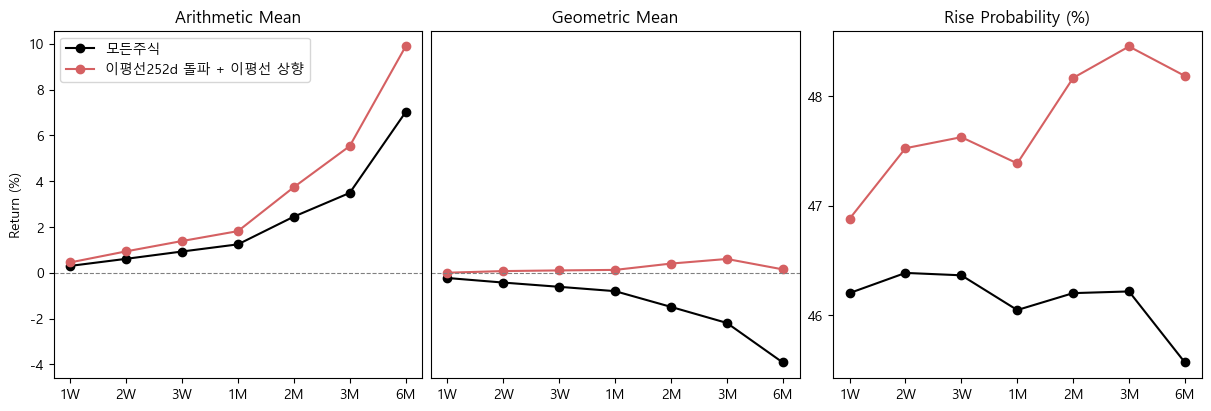

In [42]:
ma = Trending(name='이평선252d 돌파').on(trigger='breakout_up', window=252, cooldown_days=3)
ma_u = Trending(name='이평선 상향').on(trigger='ma_trend_up', window=252, cooldown_days=3)
stats = bt.analyze(ma + ma_u)
stats.plot(end=end_book)

##### 전체구간 (2000-2025)

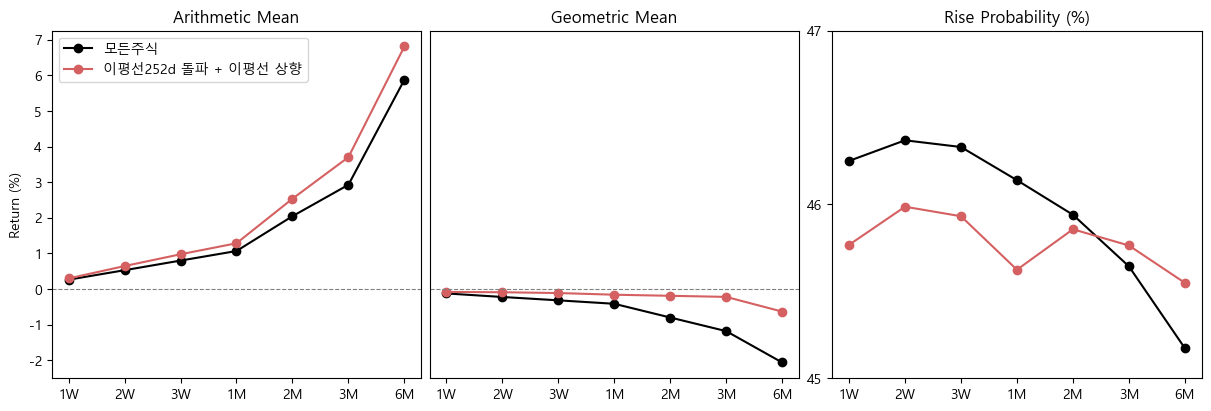

In [43]:
stats.plot()

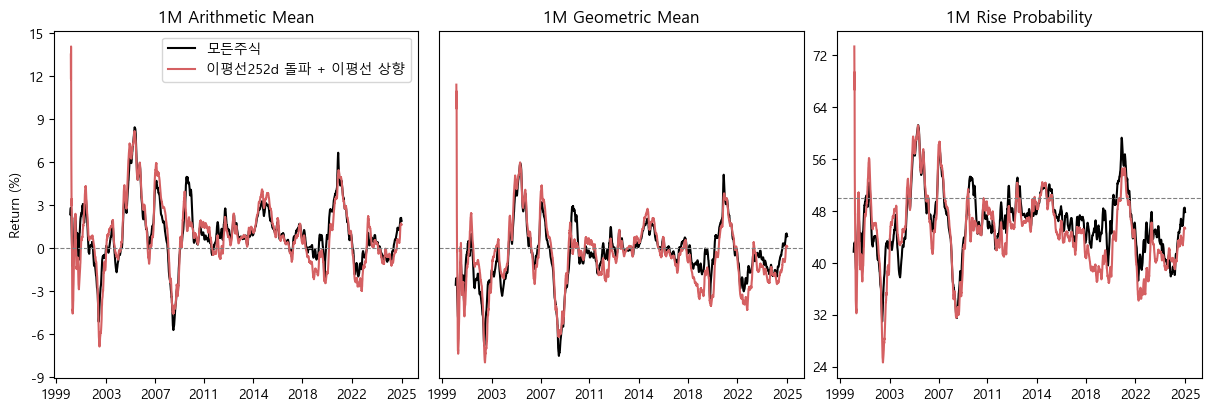

In [45]:
stats.plot_history(horizon='1M')

##### 리밸런싱 (총편입비 변동X)

이평선252d 돌파 + 이평선 상향 | mask:   0%|          | 0/3499 [00:00<?, ?it/s]

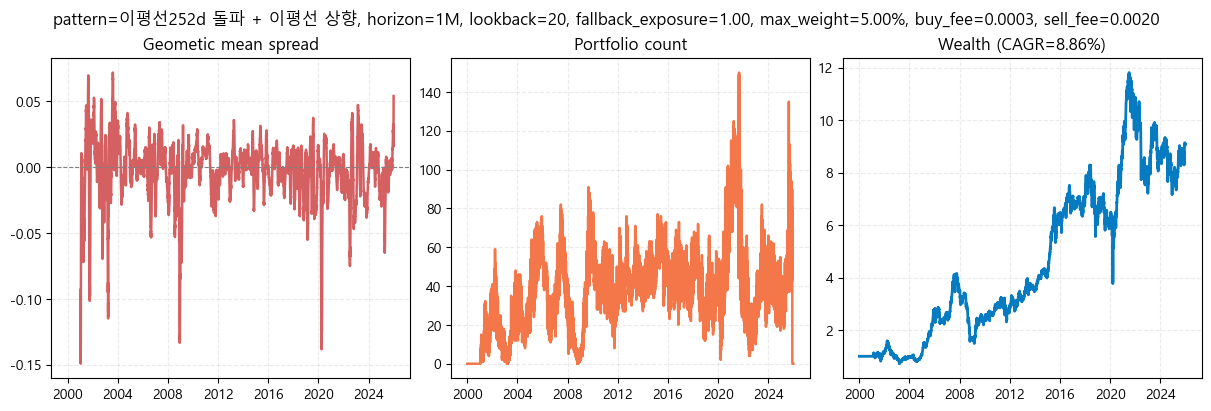

In [44]:
simul = bt.run(
    pattern="이평선252d 돌파 + 이평선 상향",
    target_horizon=20,
    aggregate_lookback=20,
    fallback_exposure=1.0,
    max_weight_per_stock=0.05
)
simul.plot()

##### 리밸런싱 (총편입비 변동)

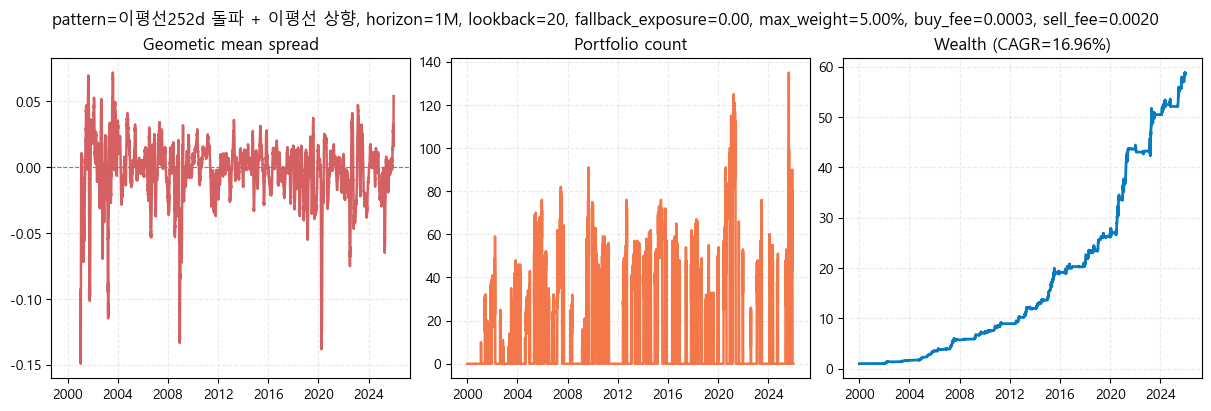

In [46]:
simul = bt.run(
    pattern="이평선252d 돌파 + 이평선 상향",
    target_horizon=20,
    aggregate_lookback=20,
    fallback_exposure=0.0,
    max_weight_per_stock=0.05
)
simul.plot()

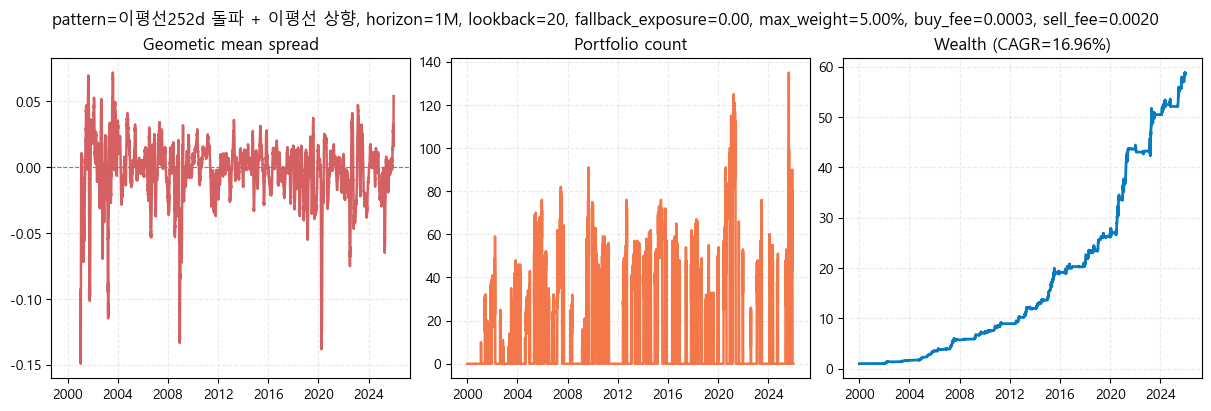

In [39]:
simul = bt.run(
    pattern="이평선252d 돌파 + 이평선 상향",
    target_horizon=20,
    aggregate_lookback=20,
    fallback_exposure=0.0,
    max_weight_per_stock=0.05
)
simul.plot()

### 볼린저밴드

##### 책 구간 (2000-2011)

볼린저돌파 | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

볼린저돌파 + 52주 고가 | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

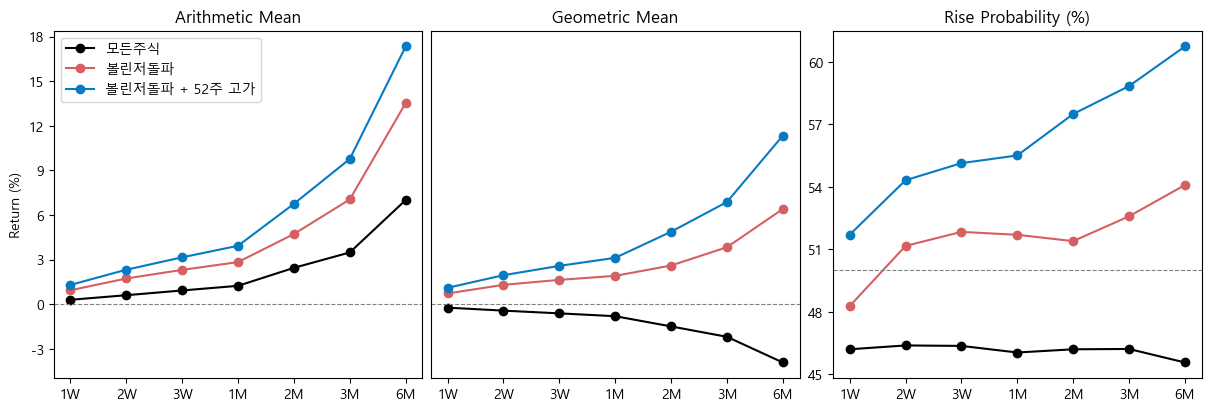

In [69]:
bb = Bollinger(name='볼린저돌파').on(trigger='breakout_up', breakout_cooldown_days=3, bandwidth_max=0.05)
high52w = High(name='52주 고가').on(window=252, threshold=0.90, stay_days=1)
bb_high52w = bb + high52w

stats = bt.analyze(bb, bb_high52w)
stats.plot(end=end_book)

##### 전체구간 (2000-2025)

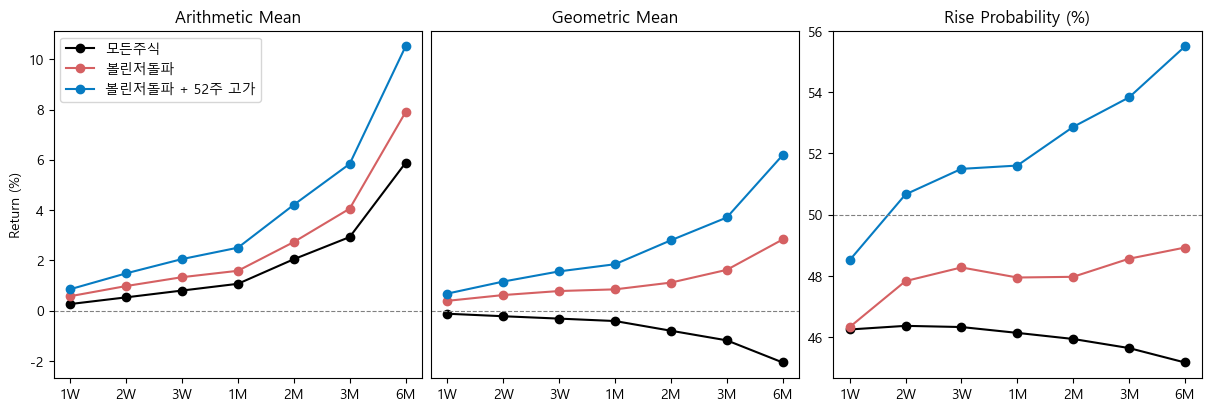

In [48]:
stats.plot()

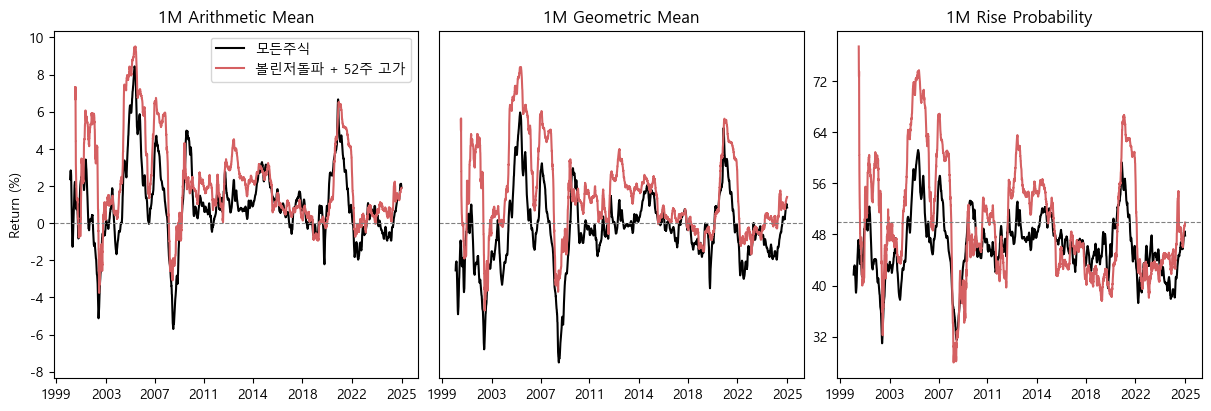

In [50]:
stats.plot_history(horizon='1M', patterns=['모든주식', '볼린저돌파 + 52주 고가'])

##### 리밸런싱 (총편입비 변동X)

볼린저돌파 + 52주 고가 | mask:   0%|          | 0/3499 [00:00<?, ?it/s]

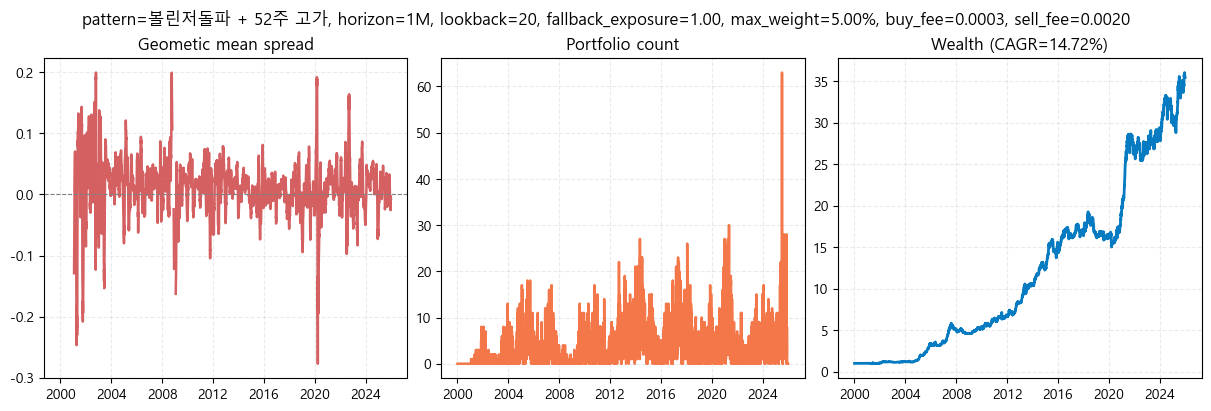

In [70]:
simul = bt.run(
    pattern="볼린저돌파 + 52주 고가",
    target_horizon=20,
    aggregate_lookback=20,
    fallback_exposure=1.0,
    max_weight_per_stock=0.05
)
simul.plot()

##### 리밸런싱 (총편입비 변동)

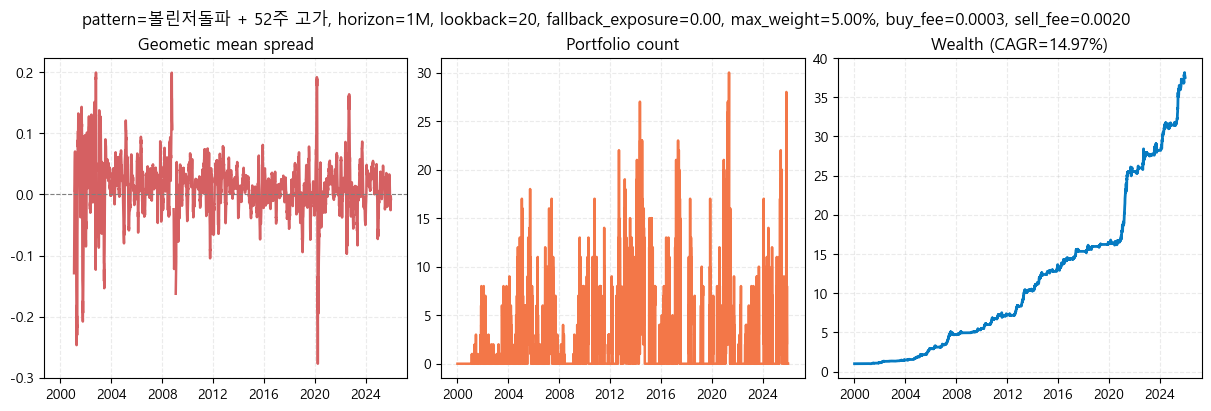

In [71]:
simul = bt.run(
    pattern="볼린저돌파 + 52주 고가",
    target_horizon=20,
    aggregate_lookback=20,
    fallback_exposure=0.0,
    max_weight_per_stock=0.05
)
simul.plot()

### 이격도

##### 책 구간 (2000-2011)

이격도 90% | codes:   0%|          | 0/3499 [00:00<?, ?it/s]

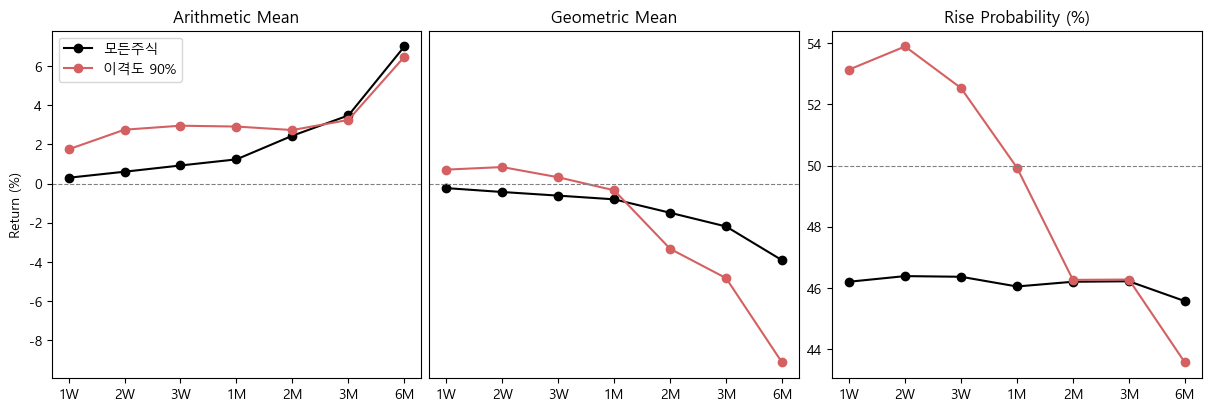

In [62]:
dp = Disparity(name="이격도 90%", window=20).on(threshold=0.9, stay_days=5, cooldown_days=5)
stats = bt.analyze(dp)
stats.plot(end=end_book)

##### 전체구간 (2000-2025)

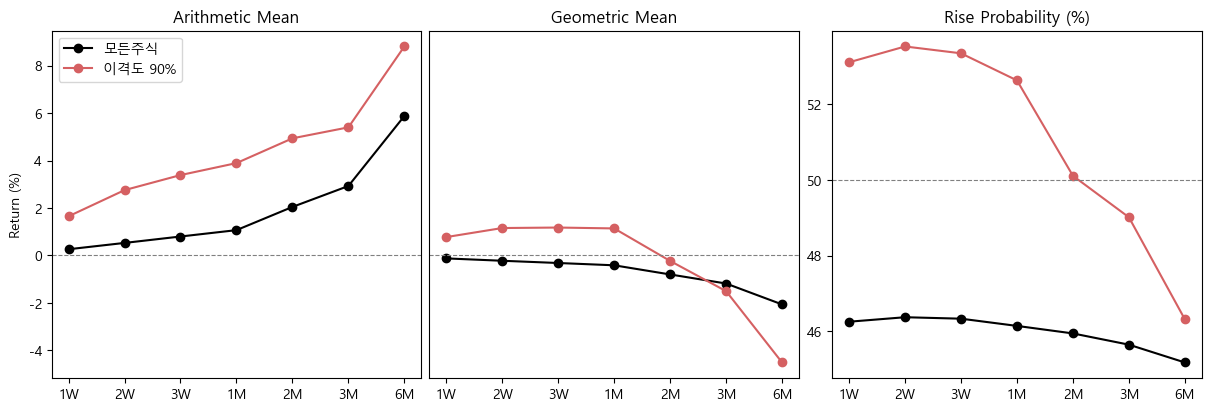

In [63]:
stats.plot()

##### 리밸런싱 (총편입비 조절)

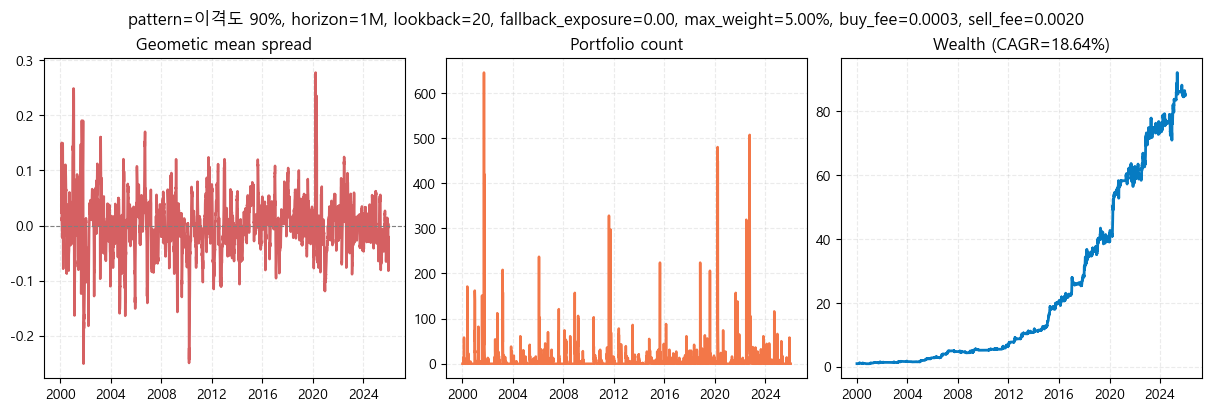

In [76]:
simul = bt.run(
    pattern="이격도 90%",
    target_horizon=20,
    aggregate_lookback=20,
    fallback_exposure=0.0,
    max_weight_per_stock=0.05
)
simul.plot()

##### 리밸런싱 (총편입비 조절) - 투자기간을 좀더 짧게

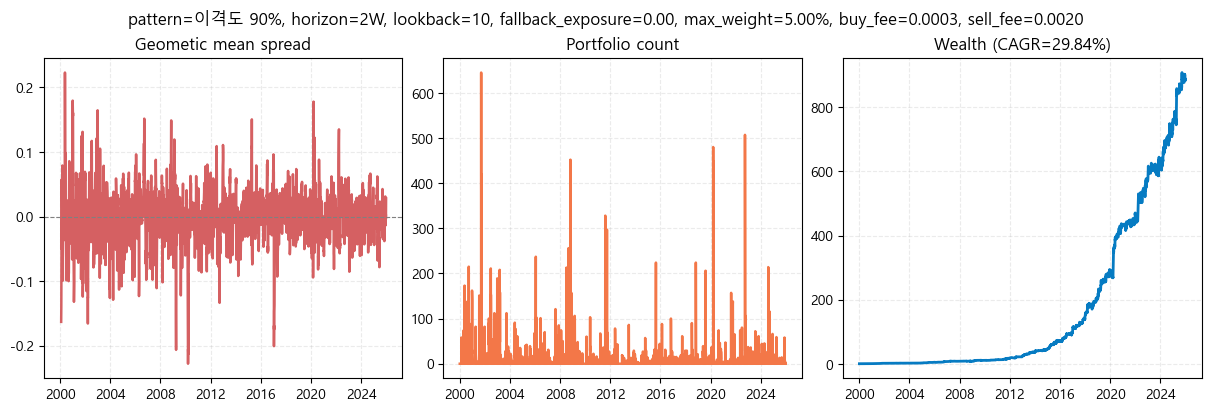

In [77]:
simul = bt.run(
    pattern="이격도 90%",
    target_horizon=10,
    aggregate_lookback=10,
    fallback_exposure=0.0,
    max_weight_per_stock=0.05
)
simul.plot()